In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [2]:
%sql sqlite:///results.db

# Compression

In [4]:
%sql select avg(length(name)) from alias;

 * sqlite:///results.db
Done.


avg(length(name))
4.25948065487735


In [5]:
%sql select avg(length(value)) from alias;

 * sqlite:///results.db
Done.


avg(length(value))
23.714548005874242


The median compression ratio (from https://stackoverflow.com/a/15766121)

In [6]:
%%sql
SELECT (length(value)*1.0/length(name)) as r
FROM alias
ORDER BY r
LIMIT 1
OFFSET (SELECT COUNT(*) FROM alias) / 2

 * sqlite:///results.db
Done.


r
4.25


In [12]:
ratios = %sql select (length(value)*1.0/length(name)) as r, count(*) from alias group by r order by r asc

 * sqlite:///results.db
Done.


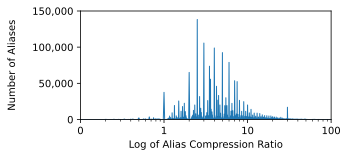

In [28]:
plot = ratios.DataFrame().set_index('r').plot(logx=True,xlim=(0.1,100),ylim=(0,150000),linewidth=1,figsize=(4.5,2))
plot.get_legend().remove()
plot.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plot.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plot.set_xlabel('Log of Alias Compression Ratio')
plot.set_ylabel('Number of Aliases\n')
plt.show()

In [34]:
%%sql 
with total as (select count(*) as total from alias)
select 
    count(*) as '#',
    round(count(*)*100.0/total,2) as '%'
from alias 
join total
where (length(value)*1.0/length(name)) < 1

 * sqlite:///results.db
Done.


#,%
26055,1.18


In [46]:
%sql select * from alias order by random() limit 10;

 * sqlite:///results.db
Done.


alias_id,file_id,name,value,num_commands
1098727,444164,gs,g status -s,1
1214844,470157,week,date +%V,1
2138939,761346,q,qstat,1
889747,391812,ls,ls -GH,1
89503,84070,which,type -path,1
1545385,537720,lsa,ls -lah,1
1562697,540240,fgrep,fgrep --color=auto,1
1671371,587018,paclf,/usr/bin/pacman -Ql,1
79279,78268,d,docker,1
33110,39835,scratch,cd /scratch/twmccart,1


In [48]:
%sql select * from alias where length(value)*1.0/length(name) < 1 order by random() limit 10;

 * sqlite:///results.db
Done.


alias_id,file_id,name,value,num_commands
994397,419696,nautilus,caja,1
662645,310540,cd,c,1
2008782,703451,download_file,wget -q -O -,1
1790360,633923,screenshot,import,1
24130,31806,cded,cde,1
1030954,429774,ck_gettext,echo -e,1
2017078,705569,bukuopen,buku -o,1
1256049,479279,retour,cd ..,1
515989,263461,configScripts,cd ~/bin,1
1400048,508148,vimmyfavoritetexteditor,vim,1
